In [152]:
### General ###

import numpy as np
import pandas as pd
import calendar
import datetime

#### Visualization Tools ###

# Base of sns
import matplotlib.pyplot as plt

# Born on top of matplotlib, but more attractive
import seaborn as sns

# For interactive visualization, not good for too many datapoints
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Llamados

In [110]:
df_viento = pd.read_csv('./meteochile/dataset/viento_dataset.csv', delimiter=';')
df_viento['momento'] = pd.to_datetime(df_viento['momento'])
df_viento.head()

,momento,ddInst,ffInst
0,2019-02-05 18:27:00,218.0,9.7
1,2019-02-05 18:28:00,208.0,8.0
2,2019-02-05 18:29:00,230.0,6.2
3,2019-02-05 18:30:00,213.0,6.8
4,2019-02-05 18:31:00,232.0,9.3


In [111]:
df_llamados = pd.read_csv('./coelcha/llamados_clean.csv')
df_viento['momento'] = pd.to_datetime(df_viento['momento'])
df_llamados.head()

,Periodo,Número total de llamadas recibidas por mes (NLLR),Número total de llamadas atendidas en IVR por mes (NRIVR),Número total de llamadas desistidas en IVR por mes (NDIVR),Número total de llamadas atendidas por ejecutivo por mes (NREJC),Número total de llamadas cursadas por gestión de abandono por mes (NGA),Porcentaje de llamadas perdidas (LLP%),"Tasa de ocupación de las líneas, registradas con una frecuencia de una hora (OC)","Tiempo promedio de espera, considerando las llamadas atendidas por un ejecutivo (TPE)","Tiempo de conversación promedio, considerando las llamadas atendidas por un ejecutivo (TPC)"
0,2023-07-01,2907,700,0,2207,478,16.44,0,00:05:09,00:07:24
1,2023-06-01,3785,925,0,1972,554,14.63,0,00:04:51,00:07:09
2,2023-05-01,3342,816,0,1958,902,26.98,0,00:04:28,00:06:58
3,2023-04-01,4280,938,0,2285,1057,24.69,0,00:04:56,00:06:48
4,2023-03-01,3556,806,0,2163,587,16.50,0,00:04:33,00:06:14


In [112]:
df_llamados.columns

Index(['Periodo', 'Número total de llamadas recibidas por mes (NLLR)',
       'Número total de llamadas atendidas en IVR por mes (NRIVR)',
       'Número total de llamadas desistidas en IVR por mes (NDIVR)',
       'Número total de llamadas atendidas por ejecutivo por mes (NREJC)',
       'Número total de llamadas cursadas por gestión de abandono por mes (NGA)',
       'Porcentaje de llamadas perdidas (LLP%)',
       'Tasa de ocupación de las líneas, registradas con una frecuencia de una hora (OC)',
       'Tiempo promedio de espera, considerando las llamadas atendidas por un ejecutivo (TPE)',
       'Tiempo de conversación promedio, considerando las llamadas atendidas por un ejecutivo (TPC)'],
      dtype='object')

In [113]:
columns = df_llamados.columns
new_columns = [col.split('(')[-1].split(')')[0] for col in columns]
df_llamados.columns = new_columns

In [114]:
df_llamados.head()

,Periodo,NLLR,NRIVR,NDIVR,NREJC,NGA,LLP%,OC,TPE,TPC
0,2023-07-01,2907,700,0,2207,478,16.44,0,00:05:09,00:07:24
1,2023-06-01,3785,925,0,1972,554,14.63,0,00:04:51,00:07:09
2,2023-05-01,3342,816,0,1958,902,26.98,0,00:04:28,00:06:58
3,2023-04-01,4280,938,0,2285,1057,24.69,0,00:04:56,00:06:48
4,2023-03-01,3556,806,0,2163,587,16.50,0,00:04:33,00:06:14


In [115]:
df_llamados.drop(columns=['NDIVR', 'OC'], inplace=True)

In [116]:
def convert_to_seconds(time_str):
    time_object = datetime.datetime.strptime(time_str, '%H:%M:%S')
    total_seconds = time_object.hour * 3600 + time_object.minute * 60 + time_object.second
    return total_seconds

df_llamados['TPC'] = df_llamados['TPC'].apply(convert_to_seconds)
df_llamados['TPE'] = df_llamados['TPE'].apply(convert_to_seconds)
df_llamados.head()

,Periodo,NLLR,NRIVR,NREJC,NGA,LLP%,TPE,TPC
0,2023-07-01,2907,700,2207,478,16.44,309,444
1,2023-06-01,3785,925,1972,554,14.63,291,429
2,2023-05-01,3342,816,1958,902,26.98,268,418
3,2023-04-01,4280,938,2285,1057,24.69,296,408
4,2023-03-01,3556,806,2163,587,16.50,273,374


In [117]:
df_llamados.describe().T

,count,mean,std,min,25%,50%,75%,max
NLLR,43.0,3987.627907,1358.045971,1621.00,3251.50,3763.0,4420.500,8021.00
NRIVR,43.0,660.186047,564.884365,0.00,0.00,731.0,919.500,2478.00
NREJC,43.0,2166.209302,729.909536,1088.00,1710.00,1980.0,2452.000,5412.00
NGA,43.0,243.906977,272.118393,0.00,0.00,159.0,369.000,1057.00
LLP%,43.0,28.265814,14.478049,7.71,18.11,23.2,37.425,77.01
TPE,43.0,179.139535,142.391911,6.00,20.00,236.0,293.500,414.00
TPC,43.0,229.348837,165.952788,40.00,61.00,260.0,395.000,511.00


In [118]:
df_lluvia = pd.read_csv('./meteochile/dataset/lluvia_dataset.csv', delimiter=';')
df_lluvia['momento'] = pd.to_datetime(df_lluvia['momento'])
df_lluvia.head()

,momento,rrInst
0,2019-02-05 18:27:00,0.0
1,2019-02-05 18:28:00,0.0
2,2019-02-05 18:29:00,0.0
3,2019-02-05 18:30:00,0.0
4,2019-02-05 18:31:00,0.0


In [119]:
# Fill missing days/hours/minutes
date_range = pd.date_range(
    df_lluvia['momento'].min(), 
    df_lluvia['momento'].max(), freq='min')
date_df = pd.DataFrame({'momento': date_range})
merged_df_lluvia = pd.merge(date_df, df_lluvia, how='left', on='momento')

print(merged_df_lluvia.info())

date_range = pd.date_range(
    df_viento['momento'].min(), 
    df_viento['momento'].max(), freq='min')
merged_df_viento = pd.merge(date_df, df_viento, how='left', on='momento')

print(merged_df_lluvia.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2357662 entries, 0 to 2357661
Data columns (total 2 columns):
 #   Column   Dtype         
---  ------   -----         
 0   momento  datetime64[ns]
 1   rrInst   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 54.0 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2357662 entries, 0 to 2357661
Data columns (total 2 columns):
 #   Column   Dtype         
---  ------   -----         
 0   momento  datetime64[ns]
 1   rrInst   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 54.0 MB
None


In [120]:
print(df_lluvia.shape[0], 'to', merged_df_lluvia.shape[0])
print(df_viento.shape[0], 'to', merged_df_viento.shape[0])

2128546 to 2357662
2150613 to 2357663


In [121]:
start_time = pd.to_datetime('2023-01-01')
end_time = pd.to_datetime('2023-02-03')

test_df_viento = df_viento[(df_viento['momento'] >= start_time) & (df_viento['momento'] <= end_time)]
test_df_lluvia = df_lluvia[(df_lluvia['momento'] >= start_time) & (df_lluvia['momento'] <= end_time)]

print(test_df_viento.count(), test_df_lluvia.count())
print(min(test_df_viento['momento']), max(test_df_viento['momento']), min(test_df_lluvia['momento']), max(test_df_lluvia['momento']))

start_time = pd.to_datetime('2023-01-01')
end_time = pd.to_datetime('2023-02-04')

test_df_viento = df_viento[(df_viento['momento'] >= start_time) & (df_viento['momento'] <= end_time)]
test_df_lluvia = df_lluvia[(df_lluvia['momento'] >= start_time) & (df_lluvia['momento'] <= end_time)]

print(test_df_viento.count(), test_df_lluvia.count())
print(min(test_df_viento['momento']), max(test_df_viento['momento']), min(test_df_lluvia['momento']), max(test_df_lluvia['momento']))

momento    84
ddInst     84
ffInst     84
dtype: int64 momento    84
rrInst     84
dtype: int64
2023-01-01 00:00:00 2023-01-01 01:29:00 2023-01-01 00:00:00 2023-01-01 01:29:00
momento    647
ddInst     647
ffInst     647
dtype: int64 momento    647
rrInst     647
dtype: int64
2023-01-01 00:00:00 2023-02-04 00:00:00 2023-01-01 00:00:00 2023-02-04 00:00:00


In [122]:
print(merged_df_lluvia.info(), merged_df_lluvia.isnull().sum())
print(merged_df_viento.info(), merged_df_viento.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2357662 entries, 0 to 2357661
Data columns (total 2 columns):
 #   Column   Dtype         
---  ------   -----         
 0   momento  datetime64[ns]
 1   rrInst   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 54.0 MB
None momento         0
rrInst     229116
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2357663 entries, 0 to 2357662
Data columns (total 3 columns):
 #   Column   Dtype         
---  ------   -----         
 0   momento  datetime64[ns]
 1   ddInst   float64       
 2   ffInst   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 72.0 MB
None momento         0
ddInst     207050
ffInst     207050
dtype: int64


# Viento

In [123]:
b = merged_df_viento[['momento', 'ffInst']].copy()
b = b.set_index('momento').resample('D').ffInst.mean().reset_index()
px.line(b, y='ffInst', x='momento')

# Lluvia

In [124]:
c = merged_df_lluvia[['momento', 'rrInst']].copy()
c = c.set_index('momento').resample('D').rrInst.mean().reset_index()
px.line(c, y='rrInst', x='momento')

# Data Imputation

In [125]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D

scaler = MinMaxScaler()

df_knn_lluvia = merged_df_lluvia[['momento', 'rrInst']].copy()
df_knn_viento = merged_df_viento[['momento', 'ffInst']].copy()

df_knn_lluvia = df_knn_lluvia.set_index('momento').resample('D').rrInst.mean().reset_index()
df_knn_viento = df_knn_viento.set_index('momento').resample('D').ffInst.mean().reset_index()

# Impute data based on day and month
df_knn_lluvia['day'] = df_knn_lluvia['momento'].dt.day
df_knn_lluvia['month'] = df_knn_lluvia['momento'].dt.month
df_knn_lluvia['year'] = df_knn_lluvia['momento'].dt.year

df_knn_viento['day'] = df_knn_viento['momento'].dt.day
df_knn_viento['month'] = df_knn_viento['momento'].dt.month
df_knn_viento['year'] = df_knn_viento['momento'].dt.year

print(df_knn_viento.month.min(), df_knn_viento.month.max())
print(df_knn_lluvia.month.min(), df_knn_lluvia.month.max())

df_knn_viento = df_knn_viento.drop(columns='momento')
df_knn_lluvia = df_knn_lluvia.drop(columns='momento')

# Scale data
df_knn_lluvia = pd.DataFrame(scaler.fit_transform(df_knn_lluvia), columns = df_knn_lluvia.columns)
df_knn_viento = pd.DataFrame(scaler.fit_transform(df_knn_viento), columns = df_knn_viento.columns)

# Impute
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

df_knn_lluvia_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn_lluvia), columns=df_knn_lluvia.columns)
df_knn_viento_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn_viento), columns=df_knn_viento.columns)

df_knn_lluvia_imputed.isnull().sum(), df_knn_viento_imputed.isnull().sum()

1 12
1 12


(rrInst    0
 day       0
 month     0
 year      0
 dtype: int64,
 ffInst    0
 day       0
 month     0
 year      0
 dtype: int64)

In [126]:
df_knn_lluvia_imputed.shape, df_knn_viento_imputed.shape

((1639, 4), (1639, 4))

In [127]:
px.line(df_knn_viento_imputed, y='ffInst')

In [128]:
px.line(df_knn_lluvia_imputed, y='rrInst')

In [129]:
df_viento_processed = pd.DataFrame(scaler.inverse_transform(df_knn_viento_imputed), columns=df_knn_viento_imputed.columns)
df_lluvia_processed = pd.DataFrame(scaler.inverse_transform(df_knn_lluvia_imputed), columns=df_knn_lluvia_imputed.columns)

df_viento_processed[['day', 'month', 'year']] = df_viento_processed[['day', 'month', 'year']].apply(np.ceil).astype(int)
df_lluvia_processed[['day', 'month', 'year']] = df_lluvia_processed[['day', 'month', 'year']].apply(np.ceil).astype(int)

a = df_viento_processed.copy()
df_viento_processed['momento'] = pd.to_datetime(dict(year=a.year, month=a.month, day=a.day))

a = df_lluvia_processed.copy()
df_lluvia_processed['momento'] = pd.to_datetime(dict(year=a.year, month=a.month, day=a.day))

# Analyzing

## Distributions

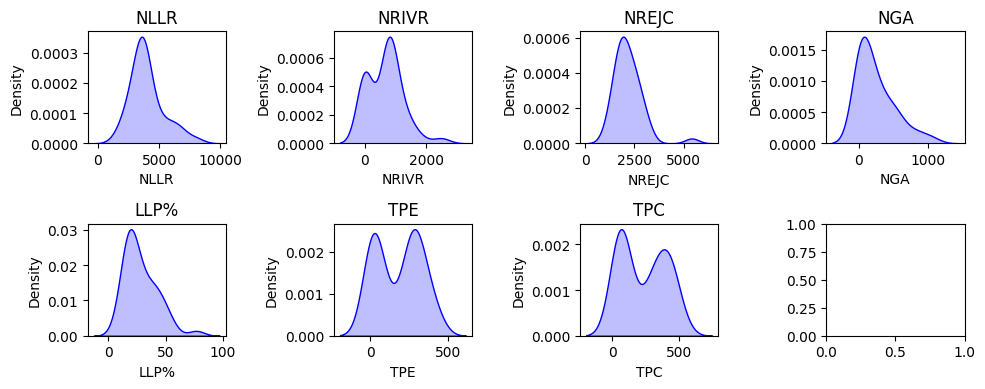

In [130]:
n_cols = 4
columns = df_llamados.drop(columns='Periodo')
fig, axes = plt.subplots(nrows=2, ncols=n_cols, figsize=(10, 4))
index_col = 0
index_row = 0
for c in columns:
    ax = axes[index_col, index_row]
    ax.set_title(c)
    sns.kdeplot(df_llamados[c], fill=True, ax=ax, color='blue')
    if index_row < n_cols - 1:
        index_row += 1
    else:
        index_col += 1
        index_row = 0
plt.tight_layout()
plt.show()

## Plot

In [174]:

a = df_llamados[['Periodo', 'NLLR', 'NREJC', 'NRIVR', 'TPE', 'TPC']].copy()
b = df_viento_processed[['momento', 'ffInst']].copy()
c = df_lluvia_processed[['momento', 'rrInst']].copy()

mindate = df_llamados['Periodo'].min()
maxdate = df_llamados['Periodo'].max()

b = b[b['momento'] >= mindate]
b = b[b['momento'] <= maxdate]

c = c[c['momento'] >= mindate]
c = c[c['momento'] <= maxdate]

b = b.set_index('momento').resample('M').ffInst.mean().reset_index()
b['momento'] = b['momento'].apply(lambda x: x.replace(day=1))

c = c.set_index('momento').resample('M').rrInst.mean().reset_index()
c['momento'] = c['momento'].apply(lambda x: x.replace(day=1))

a.rename(columns={'Periodo': 'momento'}, inplace=True)
a['momento'] = pd.to_datetime(a['momento'])

plot_df = pd.merge(a, b, on='momento', how='inner')
plot_df = pd.merge(plot_df, c, on='momento', how='inner')
plot_df = plot_df.set_index("momento")

plot_df.rename(columns={'ffInst': 'Viento', 'rrInst': 'Lluvia'}, inplace=True)

before_scaling_df = plot_df.copy()

#plot_df['Viento+Lluvia'] = plot_df['Viento'] + plot_df['Lluvia']

cols = plot_df.columns
scaler = MinMaxScaler(feature_range=(0,1))
#scaler = StandardScaler()
indexes = plot_df.index
plot_df = pd.DataFrame(scaler.fit_transform(plot_df), columns=cols)

### Llamados vs Viento y Lluvia

In [175]:
fig = px.line(plot_df, x=indexes, y=['Viento', 'Lluvia',  'NLLR'],
              title='Interacción Viento/Lluvia en Llamados por mes',
              labels={'value': 'Valores Normalizados', 'x': 'Fecha'}
              )

fig.show()

In [176]:
# Plotting using plotly.express
fig = px.line(plot_df, x=indexes, y=['Viento', 'Lluvia', 'TPE', 'TPC'],
              title='Interacción Viento/Lluvia en Tiempo de llamada por mes',
              labels={'value': 'Valores Normalizados', 'x': 'Fecha'}
              )

fig.show()

In [177]:
# Plotting using plotly.express
fig = px.line(plot_df, x=indexes, y=['Viento', 'Lluvia',  'NRIVR'],
              title='Interacción Viento/Lluvia en Llamados en IVR por mes',
              labels={'value': 'Valores Normalizados', 'x': 'Fecha'}
              )

fig.show()

In [178]:
plot_df['NLLR-NRIVR'] = plot_df['NLLR'] - plot_df['NRIVR']

# Plotting using plotly.express
fig = px.line(plot_df, x=indexes, y=['Viento', 'Lluvia',  'NLLR-NRIVR'],
              title='Interacción Viento/Lluvia en Llamados NLLR-NRIVR por mes',
              labels={'value': 'Valores Normalizados', 'x': 'Fecha'}
              )

fig.show()

### Correlations

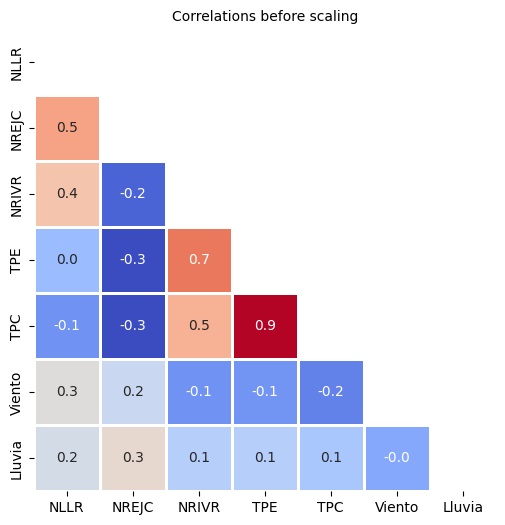

In [179]:
a = before_scaling_df.copy()
a = a.corr()
mask = np.triu(a.corr())

plt.figure(figsize=(10, 6))

sns.heatmap(a,
        annot=True,
        fmt='.1f',
        cmap='coolwarm',
        square=True,
        mask=mask,
        linewidths=1,
        cbar=False)

plt.title("Correlations before scaling",fontsize = 10)
plt.show()

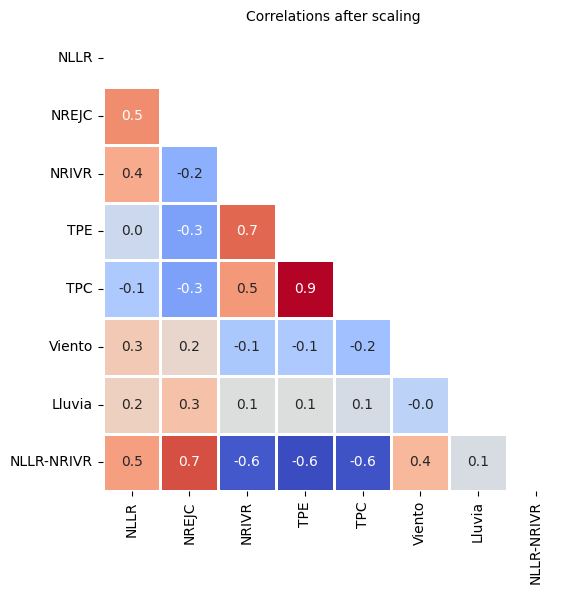

In [180]:
a = plot_df.copy()
a = a.corr()
mask = np.triu(a.corr())

plt.figure(figsize=(10, 6))

sns.heatmap(a,
        annot=True,
        fmt='.1f',
        cmap='coolwarm',
        square=True,
        mask=mask,
        linewidths=1,
        cbar=False)

plt.title("Correlations after scaling",fontsize = 10)
plt.show()

- Se puede apreciar visualmente una relación casi directa en los primeros meses de los efectos del viento y la lluvia en el NLLR en el mes de Mayo y Junio 2020.
- Si bien los llamados pueden deberse a distintas razones, se aprecia la diferencia entre antes del 1 de junio 2021 y después, en el tiempo promedio de llamada.

    - Esto podría deberse a varias razones como etapas iniciales en el desarrollo del servicio, cambios en el sistema, o cambios en los servicios que ofrecen.

    - Esto se confirma al comprobar otros tipos de información en la plataforma que comienzan desde el 2021~2022 (fallas, reclamos)

In [181]:
df_reclamos = pd.read_csv('./coelcha/reclamos_clean.csv')
df_reclamos.head()

,Tipo Requerimiento,Eficiencia servicio Comercial (Eficiencia),Eficacia servicio Comercial (Eficiencia),Oportunidad del servicio Comercial (OP),"Tiempo medio de resolucion de reclamos, consultas y solicitudes (TRR)","Indicador de nivel de reclamo, consulta y solicitud (INR)",Indicador de facturacion emitida (IFE),Indicador de facturacion emitida con consumo estimado (IFEEs),Errores en emision de facturas por errores de lectura (EFErt),Errores en emision de facturas por errores distintos al de lectura (EF),Pagos mal imputados (PMI),Fecha
0,Reclamo,95.99,96.15,93.68,24.0,0.075,100,77.97,0.986,1.0,0.994,2021-02-01
1,Consulta,97.43,100.00,100.00,1.0,0.117,100,77.97,0.986,1.0,0.994,2021-02-01
2,Solicitud,97.06,99.87,95.05,24.0,0.177,100,77.97,0.986,1.0,0.994,2021-02-01
3,Reclamo,96.37,96.38,92.90,23.0,0.083,100,75.05,0.988,1.0,0.994,2021-03-01
4,Consulta,98.11,100.00,100.00,1.0,0.149,100,75.05,0.988,1.0,0.994,2021-03-01


In [182]:
df_reclamos['Tipo Requerimiento'].unique()

array(['Reclamo', 'Consulta', 'Solicitud'], dtype=object)

In [183]:
df_reclamos['Tipo Requerimiento'].value_counts()

Reclamo      30
Consulta     30
Solicitud    30
Name: Tipo Requerimiento, dtype: int64

In [184]:
df_reclamos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 12 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Tipo Requerimiento                                                       90 non-null     object 
 1   Eficiencia servicio  Comercial (Eficiencia)                              90 non-null     float64
 2   Eficacia servicio  Comercial (Eficiencia)                                90 non-null     float64
 3   Oportunidad del servicio Comercial (OP)                                  90 non-null     float64
 4   Tiempo medio de resolucion de reclamos, consultas y solicitudes (TRR)    90 non-null     float64
 5   Indicador de nivel de reclamo, consulta y solicitud (INR)                90 non-null     float64
 6   Indicador de facturacion emitida (IFE)                                   90 

In [185]:
df_reclamos.describe().T

,count,mean,std,min,25%,50%,75%,max
Eficiencia servicio Comercial (Eficiencia),90.0,86.896222,18.356491,27.564,84.92975,95.5595,98.67250,100.000
Eficacia servicio Comercial (Eficiencia),90.0,98.817133,1.716255,94.684,97.16750,99.9285,100.00000,100.000
Oportunidad del servicio Comercial (OP),90.0,90.659300,11.415269,56.920,86.22250,94.9300,99.79500,100.000
"Tiempo medio de resolucion de reclamos, consultas y solicitudes (TRR)",90.0,8.382267,6.981920,1.000,1.00000,7.0000,13.00000,24.000
"Indicador de nivel de reclamo, consulta y solicitud (INR)",90.0,0.180622,0.099011,0.015,0.09675,0.1765,0.24575,0.418
Indicador de facturacion emitida (IFE),90.0,100.000000,0.000000,100.000,100.00000,100.0000,100.00000,100.000
Indicador de facturacion emitida con consumo estimado (IFEEs),90.0,83.651067,7.024344,75.050,80.63300,81.3320,83.39000,98.660
Errores en emision de facturas por errores de lectura (EFErt),90.0,0.987300,0.003990,0.983,0.98400,0.9855,0.99100,0.995
Errores en emision de facturas por errores distintos al de lectura (EF),90.0,0.998700,0.001166,0.997,0.99800,0.9980,1.00000,1.000
Pagos mal imputados (PMI),90.0,0.994633,0.000661,0.994,0.99400,0.9950,0.99500,0.996


In [186]:
df_reclamos['Fecha'] = pd.to_datetime(df_reclamos['Fecha'])

In [187]:
df_reclamos.columns

Index(['Tipo Requerimiento', 'Eficiencia servicio  Comercial (Eficiencia)',
       'Eficacia servicio  Comercial (Eficiencia)',
       'Oportunidad del servicio Comercial (OP)',
       'Tiempo medio de resolucion de reclamos, consultas y solicitudes (TRR)',
       'Indicador de nivel de reclamo, consulta y solicitud (INR)',
       'Indicador de facturacion emitida (IFE)',
       'Indicador de facturacion emitida con consumo estimado (IFEEs)',
       'Errores en emision de facturas por errores de lectura (EFErt)',
       'Errores en emision de facturas por errores distintos al de lectura (EF)',
       'Pagos mal imputados (PMI)', 'Fecha'],
      dtype='object')

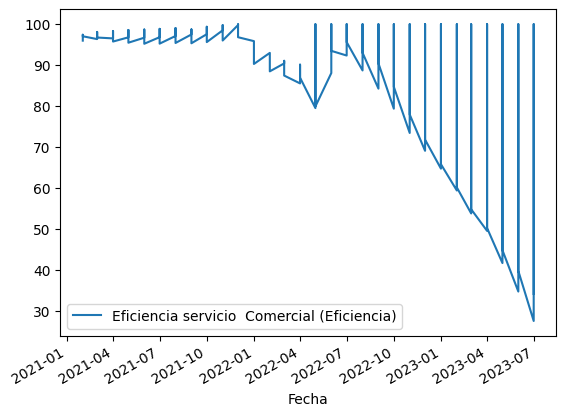

In [188]:
df_reclamos.plot(x='Fecha', y='Eficiencia servicio  Comercial (Eficiencia)');

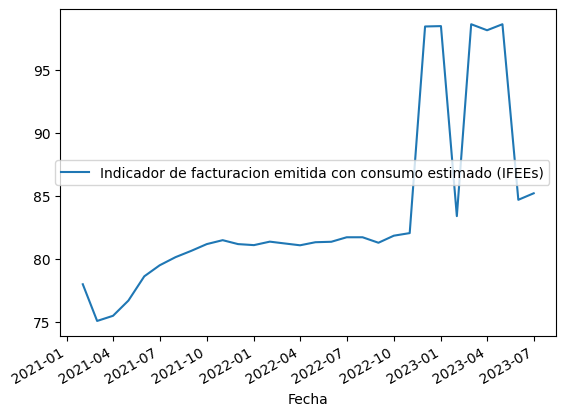

In [189]:
df_reclamos.plot(x='Fecha', y='Indicador de facturacion emitida con consumo estimado (IFEEs)');

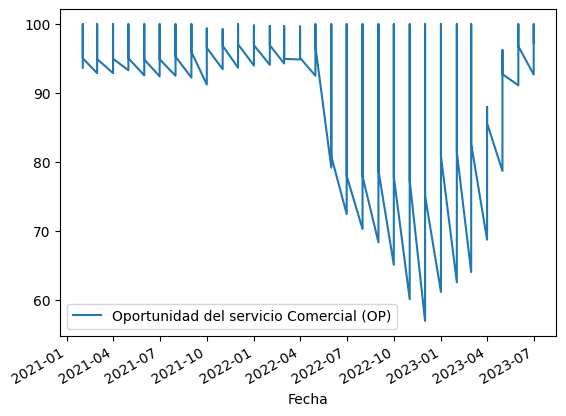

In [190]:
df_reclamos.plot(x='Fecha', y='Oportunidad del servicio Comercial (OP)');

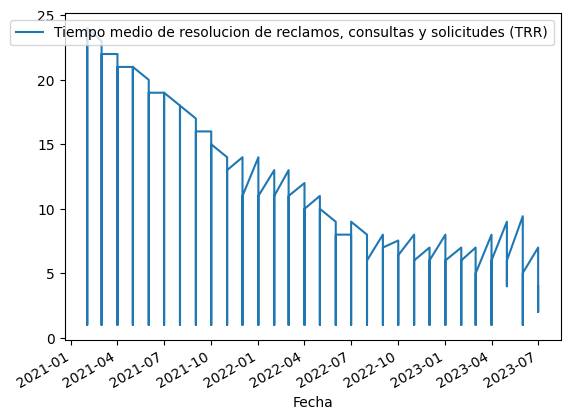

In [191]:
df_reclamos.plot(x='Fecha', y='Tiempo medio de resolucion de reclamos, consultas y solicitudes (TRR)');